In [1]:
import copy
import importlib
import os
import pathlib
from typing import Any, Mapping, Sequence

In [2]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import ray
import scipy
import seaborn as sns
import tensorflow as tf
from daaf import estimator_metrics
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats import proportion

2024-04-10 17:06:31.060419: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 17:06:31.133293: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 17:06:31.134782: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 17:06:32.669117: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from utils import dataproc

In [4]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/daaf/exp/controljob/agg/1710783127/1711123071/metrics/*.parquet")

In [5]:
df_metrics = dataproc.read_data(files)

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/datasource/parquet_datasource.py:242: FutureWarning: Passing 'use_legacy_dataset' is deprecated as of pyarrow 15.0.0 and will be removed in a future version.
  pq_ds = pq.ParquetDataset(


Metadata Fetch Progress 0:   0%|          | 0/30 [00:00<?, ?it/s]

2024-04-10 17:06:37,932	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 


Parquet Files Sample 0:   0%|          | 0/2 [00:00<?, ?it/s]

Read progress 0:   0%|          | 0/185 [00:00<?, ?it/s]

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
  return transform_pyarrow.concat(tables)


In [6]:
df_metrics

,episode,exp_id,meta,returns,metrics,method
0,630,1710783127-1d9505bc-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-25.917591125198097, -25.242472266244057, -27...","{'returns': {'mean': -26.38985736925515, 'std'...",PP/DMR
1,630,1710783127-1d89640b-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-36.30110935023772, -36.318541996830426, -36....","{'returns': {'mean': -35.62290015847861, 'std'...",PP/IMR
2,630,1710783127-1db0e303-IceWorld,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-34.00475435816165, -33.67194928684628, -34.0...","{'returns': {'mean': -34.005071315372426, 'std...",PP/LEAST
3,630,1710783127-1d5db710-IceWorld,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-33.450079239302696, -33.543581616481774, -33...","{'returns': {'mean': -33.55023771790809, 'std'...",PP/LEAST
4,630,1710783127-1d1a31c8-IceWorld,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-33.47226624405705, -33.75594294770206, -33.5...","{'returns': {'mean': -33.58858954041204, 'std'...",PP/LEAST
...,...,...,...,...,...,...
315995,1470,1710783127-fe6a0699-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-14.731475186947655, -15.038069340584636, -15...","{'returns': {'mean': -15.277090414683892, 'std...",PP/IMR
315996,1470,1710783127-fe6094fc-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-126.26444595513256, -124.39836845683209, -12...","{'returns': {'mean': -125.84687287559481, 'std...",PP/IMR
315997,1470,1710783127-fec7d9c9-RedGreenSeq,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-10.719918422841605, -9.496261046906866, -9.8...","{'returns': {'mean': -9.940516655336506, 'std'...",PP/LEAST
315998,1470,1710783127-fe818bf8-ABCSeq,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...","[-19.54180829367777, -19.250849762066622, -18....","{'returns': {'mean': -19.194017675050983, 'std...",PP/IMR


In [7]:
df_metrics.iloc[0]["meta"]

{'algorithm': 'q-learning',
 'algorithm_args': '{}',
 'discount_factor': 1.0,
 'drop_truncated_feedback_episodes': False,
 'dyna_prog_state_values': array([-38.24046866, -36.59401423, -36.54157405, -35.77078702,
        -35.88692312,   0.        , -33.25992091,   0.        ,
        -34.42030072, -32.37397904, -30.49810961,   0.        ,
          0.        , -29.57750584, -21.35853848,   0.        ]),
 'env': {'args': '{"map_name": "4x4"}',
  'level': '4x4',
  'name': 'IceWorld',
  '_level': '4KE3ASUFQGGUPERSDDRQAZAMA46CI2CMCJHGWJ7MRNI64JMEBETNDXFFPYWTQJF46S5BJ4NXXCHNMJSLII3ROYXI76DFOC3VAABGNVA='},
 'epsilon': 0.2,
 'exp_id': '1710783127-1d9505bc-IceWorld',
 'learning_rate': 0.1,
 'policy_type': 'PP',
 'reward_period': 4,
 'run_id': 12,
 'traj_mapping_method': 'DMR'}

In [8]:
envs = dataproc.get_distinct_envs(df_metrics)

In [9]:
envs

{('IceWorld', '4x4'): '{"map_name": "4x4"}',
 ('ABCSeq', 'n=7'): '{"length": 7, "distance_penalty": false}',
 ('FrozenLake-v1', '4x4'): '{"is_slippery": false, "map_name": "4x4"}',
 ('ABCSeq', 'n=10'): '{"length": 10, "distance_penalty": false}',
 ('TowerOfHanoi', 'disks=4'): '{"num_disks": 4}',
 ('RedGreenSeq',
  'n=9'): '{"cure": ["red", "green", "wait", "green", "red", "red", "green", "wait"]}',
 ('GridWorld',
  '4x12'): '{"grid": "oooooooooooo\\noooooooooooo\\noooooooooooo\\nsxxxxxxxxxxg"}',
 ('IceWorld', '8x8'): '{"map_name": "8x8"}'}

In [10]:
def create_returns_plotting_data(
    df_data: pd.DataFrame,
):
    methods = sorted(df_data["method"].unique())
    methods_palette = {
        method: color for method, color,  in zip(methods, sns.color_palette())
    }
    df_result = copy.deepcopy(df_data)
    for key in ("algorithm", "algorithm_args", "reward_period", "discount_factor"):
        df_result[key] = df_result["meta"].apply(lambda meta: meta[key])    
    for key in ("level", "name"):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["env"][key])
        
    del df_result["meta"]
    
    df_baseline = df_result[df_result["reward_period"] == 1]
    df_result = df_result[df_result["reward_period"] != 1]
    baseline_dfs = []
    distinct_algo_configs = df_result[["algorithm", "algorithm_args", "reward_period"]].drop_duplicates()
    for row in distinct_algo_configs.to_dict("records"):
        df_baseline_rp = copy.deepcopy(df_baseline)
        # reward period is one
        mask = (
            (df_baseline_rp["algorithm"] == row["algorithm"]) & 
            (df_baseline_rp["algorithm_args"] == row["algorithm_args"])
        )
        df_baseline_rp = df_baseline_rp[mask]
        df_baseline_rp["reward_period"] = row["reward_period"]
        baseline_dfs.append(df_baseline_rp)
    df_result = pd.concat(baseline_dfs + [df_result], axis=0)
    df_result = df_result.sort_values(["method", "algorithm", "reward_period", "algorithm_args"])
    
    # agg returns
    df_result["mean_returns"] = df_result["returns"].apply(lambda returns: np.mean(returns))
    dfs = {}
    algo_types = {
        "one-step": set(["sarsa", "q-learning"]),
        "n-step": set(["nstep-sarsa"]),
    }
    for algo_type, algorithms in algo_types.items():
        df_algo = df_result[df_result["algorithm"].apply(lambda met: met in algorithms)]
        dfs[algo_type] = df_algo
    
    return dfs

In [11]:
df_returns_curves = create_returns_plotting_data(df_metrics)

In [12]:
df_returns_curves["one-step"]

,episode,exp_id,returns,metrics,method,algorithm,algorithm_args,reward_period,discount_factor,level,name,mean_returns
14,630,1710783127-1f5332a6-IceWorld,"[-34.97464342313788, -34.835182250396194, -34....","{'returns': {'mean': -34.978684627575284, 'std...",OP/OT,q-learning,{},2,0.99,4x4,IceWorld,-34.978685
228,630,1710783127-1fd1497b-FrozenLake-v1,"[0.5927099841521395, 0.8098256735340729, 0.673...","{'returns': {'mean': 0.5412044374009508, 'std'...",OP/OT,q-learning,{},2,1.00,4x4,FrozenLake-v1,0.541204
231,630,1710783127-1e37fc33-TowerOfHanoi,"[-351.06180665610145, -349.7068145800317, -350...","{'returns': {'mean': -350.35015847860535, 'std...",OP/OT,q-learning,{},2,1.00,disks=4,TowerOfHanoi,-350.350158
255,630,1710783127-0bf121a4-ABCSeq,"[-73.82884310618067, -74.00316957210777, -73.7...","{'returns': {'mean': -73.90491283676705, 'std'...",OP/OT,q-learning,{},2,1.00,n=10,ABCSeq,-73.904913
286,630,1710783127-3362ab56-GridWorld,"[-212.71473851030112, -211.94770206022187, -19...","{'returns': {'mean': -205.17226624405708, 'std...",OP/OT,q-learning,{},2,0.99,4x12,GridWorld,-205.172266
...,...,...,...,...,...,...,...,...,...,...,...,...
315537,1470,1710783127-9be9a16e-FrozenLake-v1,"[0.3201903467029232, 0.09653297076818491, 0.06...","{'returns': {'mean': 0.1129503738953093, 'std'...",PP/LEAST,sarsa,{},16,0.99,4x4,FrozenLake-v1,0.112950
315634,1470,1710783127-b0dcbd56-ABCSeq,"[-18.97960571040109, -18.468388851121684, -17....","{'returns': {'mean': -18.591026512576477, 'std...",PP/LEAST,sarsa,{},16,0.99,n=10,ABCSeq,-18.591027
315717,1470,1710783127-b95906b7-FrozenLake-v1,"[0.009517335146159076, 0.16519374575118967, 0....","{'returns': {'mean': 0.15027192386131885, 'std...",PP/LEAST,sarsa,{},16,1.00,4x4,FrozenLake-v1,0.150272
315801,1470,1710783127-dcbd4570-TowerOfHanoi,"[-56.67641060503059, -58.79741672331747, -62.8...","{'returns': {'mean': -64.98225696804894, 'std'...",PP/LEAST,sarsa,{},16,1.00,disks=4,TowerOfHanoi,-64.982257


In [13]:
df_returns_curves["n-step"]

,episode,exp_id,returns,metrics,method,algorithm,algorithm_args,reward_period,discount_factor,level,name,mean_returns
62,630,1710783127-4b669bee-ABCSeq,"[-10.117274167987322, -10.26148969889065, -10....","{'returns': {'mean': -10.159904912836765, 'std...",PP/FR,nstep-sarsa,"{""nstep"": 2}",2,0.99,n=7,ABCSeq,-10.159905
67,630,1710783127-17a18dd8-FrozenLake-v1,"[0.7004754358161648, 0.6370839936608558, 0.738...","{'returns': {'mean': 0.6519017432646593, 'std'...",PP/FR,nstep-sarsa,"{""nstep"": 2}",2,1.00,4x4,FrozenLake-v1,0.651902
203,630,1710783127-2e1d1179-IceWorld,"[-16.497622820919176, -17.275752773375594, -16...","{'returns': {'mean': -16.888748019017434, 'std...",PP/FR,nstep-sarsa,"{""nstep"": 2}",2,1.00,4x4,IceWorld,-16.888748
315,630,1710783127-07619007-GridWorld,"[-46.741679873217116, -45.20443740095087, -47....","{'returns': {'mean': -46.396513470681455, 'std...",PP/FR,nstep-sarsa,"{""nstep"": 2}",2,1.00,4x12,GridWorld,-46.396513
357,630,1710783127-0ee0b612-TowerOfHanoi,"[-58.961965134706816, -59.23930269413629, -59....","{'returns': {'mean': -59.24358161648176, 'std'...",PP/FR,nstep-sarsa,"{""nstep"": 2}",2,1.00,disks=4,TowerOfHanoi,-59.243582
...,...,...,...,...,...,...,...,...,...,...,...,...
315485,1470,1710783127-8f117285-GridWorld,"[-68.13256288239293, -79.58055744391571, -57.5...","{'returns': {'mean': -82.14789259007479, 'std'...",PP/nTD-SU,nstep-sarsa,"{""nstep"": 8}",8,1.00,4x12,GridWorld,-82.147893
315606,1470,1710783127-af6a2aea-RedGreenSeq,"[-9.801495581237253, -9.872875594833447, -9.88...","{'returns': {'mean': -9.856662134602312, 'std'...",PP/nTD-SU,nstep-sarsa,"{""nstep"": 8}",8,1.00,n=9,RedGreenSeq,-9.856662
315704,1470,1710783127-c8150715-IceWorld,"[-34.23793337865398, -35.55132562882393, -35.0...","{'returns': {'mean': -34.7655676410605, 'std':...",PP/nTD-SU,nstep-sarsa,"{""nstep"": 8}",8,1.00,4x4,IceWorld,-34.765568
315708,1470,1710783127-c9066e09-ABCSeq,"[-9.566281441196464, -9.44867437117607, -10.03...","{'returns': {'mean': -9.754044867437116, 'std'...",PP/nTD-SU,nstep-sarsa,"{""nstep"": 8}",8,0.99,n=7,ABCSeq,-9.754045


## Average Returns Plots

We plot the average return for each method after every episode. This is average is from the return of every episode up until that point

In [14]:
sorted((df_returns_curves["one-step"]["name"] + "/" + df_returns_curves["one-step"]["level"]).unique())

['ABCSeq/n=10',
 'ABCSeq/n=7',
 'FrozenLake-v1/4x4',
 'GridWorld/4x12',
 'IceWorld/4x4',
 'IceWorld/8x8',
 'RedGreenSeq/n=9',
 'TowerOfHanoi/disks=4']

In [15]:
sorted((df_returns_curves["n-step"]["name"] + "/" + df_returns_curves["n-step"]["level"]).unique())

['ABCSeq/n=10',
 'ABCSeq/n=7',
 'FrozenLake-v1/4x4',
 'GridWorld/4x12',
 'IceWorld/4x4',
 'IceWorld/8x8',
 'RedGreenSeq/n=9',
 'TowerOfHanoi/disks=4']

In [16]:
def export_figure(
    figure, name: str, format: str = "pdf", dpi=300, transparent: bool = True
):
    # to be able to save, we must plot
    base_dir = os.path.dirname(name)
    if not os.path.exists(base_dir):
        tf.io.gfile.makedirs(base_dir)
    figure.savefig(f"{name}.{format}", dpi=dpi, format=format, transparent=transparent)



In [17]:
MARKERS = ["s", "p", "o", "P", "X", "d"]

In [18]:
DASHES = {
    "PP/FR": (1, 0),
    "PP/IMR": (1, 1),
    "PP/LEAST": (2, 1),
    "PP/nTD-SU": (3, 1),    
    "OP/OT": (4, 2),
    "PP/DMR": (6, 2),    
}

In [19]:
METHODS_PALETTES = {
    key: palette for key, palette in zip(
        ["PP/FR", "PP/IMR", "PP/LEAST", "PP/nTD-SU", "OP/OT", "PP/DMR"],
        sns.color_palette()
    )
}

In [20]:
SHORT_NAMES = {
    "TowerOfHanoi": "ToH",
    "RedGreenSeq": "RGS"
}

In [21]:
def plot_eval_result(
    env: str,
    level: str,
    discount_factor: float,
    df_data: pd.DataFrame,
    suffix: str,    
    max_episode: int = np.inf,
    max_reward_period: int = 8,
    output_dir: str = "figures/returnplots"
):
    df_data = df_data[suffix]
    methods = sorted(df_data["method"].unique())
    filter_mask = (
        (df_data["name"] == env) &
        (df_data["level"] == level) &
        (df_data["discount_factor"] == discount_factor) & 
        (df_data["episode"] <= max_episode) &
        (df_data["reward_period"] <= max_reward_period)        
    )
    df_result = copy.deepcopy(df_data[filter_mask])
    def rename_env(env: str):
        try:
            return SHORT_NAMES[env]
        except KeyError:
            return env
                               
    df_result["name"] = df_result["name"].apply(rename_env)
    del df_result["mean_returns"]
    df_result = df_result.explode("returns")
    
    df_result = df_result.rename(
        {
            "reward_period": "P", 
            "episode": "Episode", 
            "algorithm": "A", 
            "returns": "Avg Returns",
            "method": "Method"
        }, 
        axis=1
    )
    # split to give flexibility in plotting
    algorithms = sorted(df_result["A"].unique())
    for algorithm in algorithms:
        name_prefix = "_".join(
            [str(token) for token in ["rc", algorithm, env, level, discount_factor]]
        )
        df_plot = df_result[df_result["A"] == algorithm]

        facet_grid = sns.relplot(
            data=df_plot, x="Episode", y="Avg Returns",
            col="P", row="A",
            hue="Method",
            style="Method",
            kind="line",
            palette=METHODS_PALETTES,
            errorbar="sd",
            height=2,
            dashes=DASHES
        )
        title_template = ", ".join([f"{rename_env(env)}({level})", "P = {col_name}"])
        facet_grid.set_titles(title_template)
        export_figure(facet_grid.figure, os.path.join(output_dir, f"{name_prefix}_{suffix}"))
        plt.show()        

### ABCSeq n=7, $\gamma = 1$

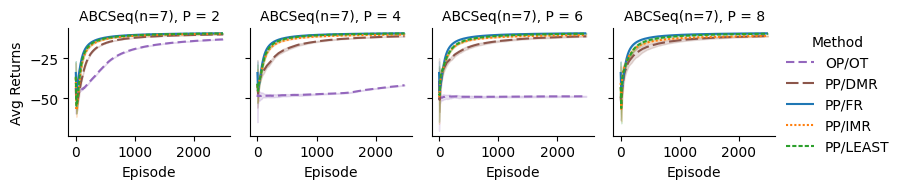

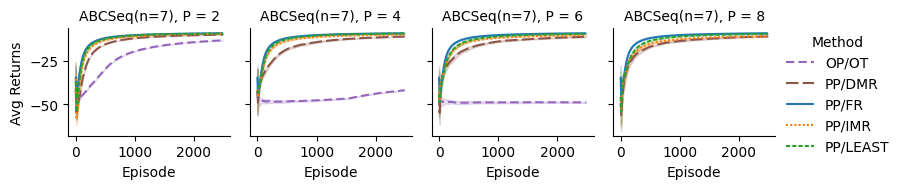

In [22]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=1.0,
    df_data=df_returns_curves,
    suffix="one-step"
)


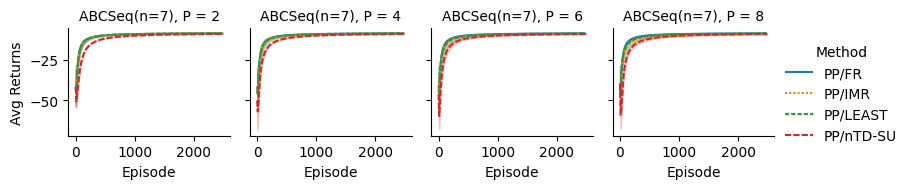

In [23]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=1.0,
    df_data=df_returns_curves,
    suffix="n-step"
)


### ABCSeq, n=7, $\gamma = 0.99$

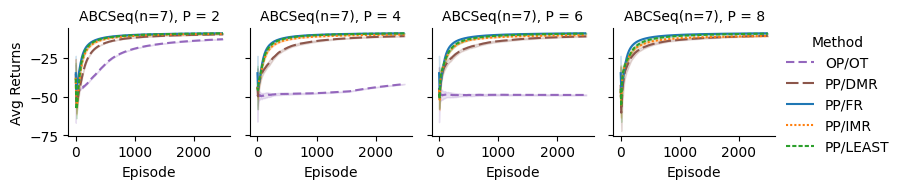

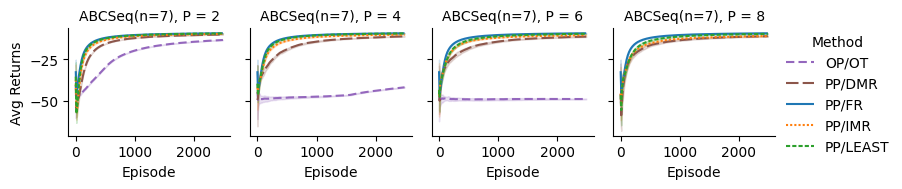

In [24]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


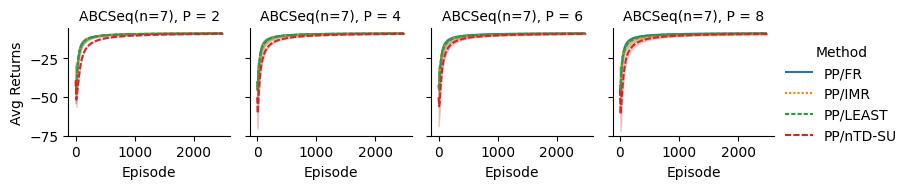

In [25]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


### ABCSeq n=10, $\gamma = 1.0$

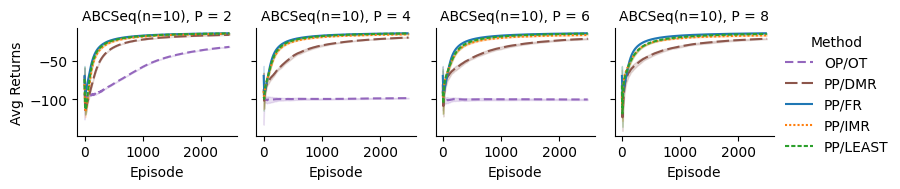

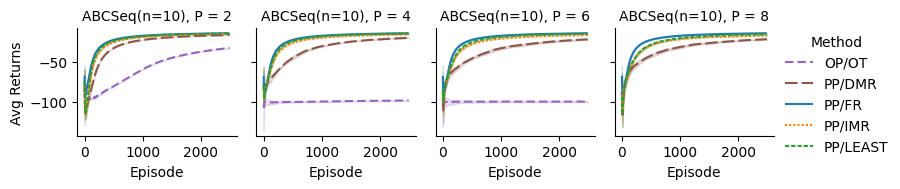

In [26]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=1.0,
    df_data=df_returns_curves,
    suffix="one-step"
)


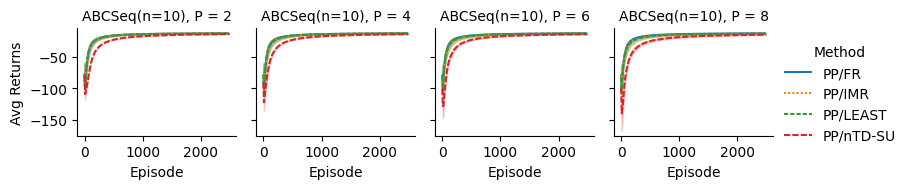

In [27]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=1.0,
    df_data=df_returns_curves,
    suffix="n-step"
)


### ABCSeq n=10, $\gamma = 0.99$

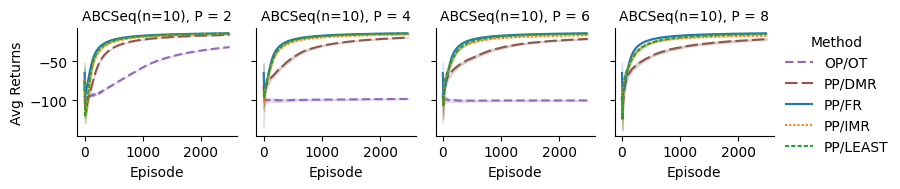

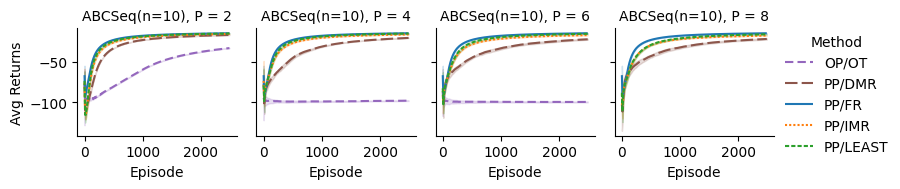

In [28]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


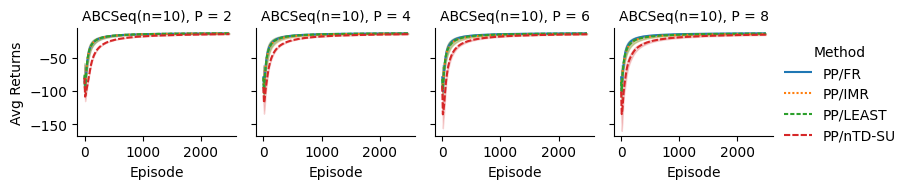

In [29]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


### GridWorld, 4x12, $\gamma = 1$

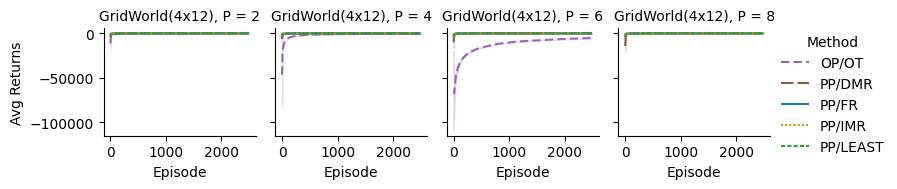

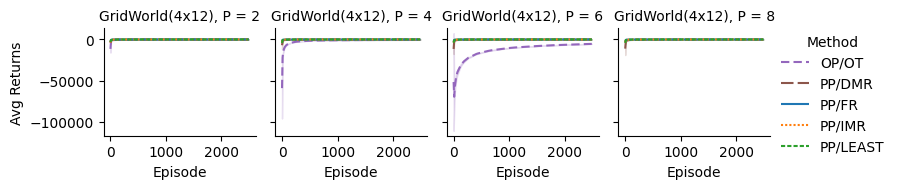

In [30]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="one-step"
)


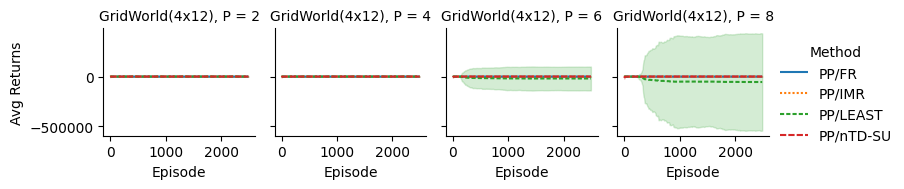

In [31]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="n-step"
)


### GridWorld, 4x12, $\gamma = 0.99$

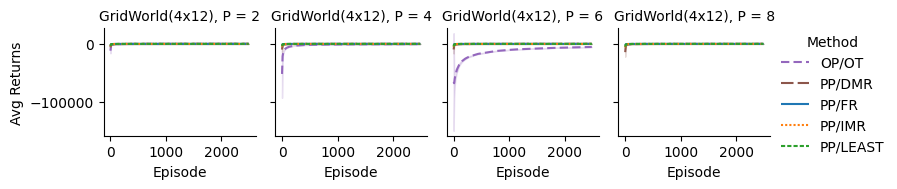

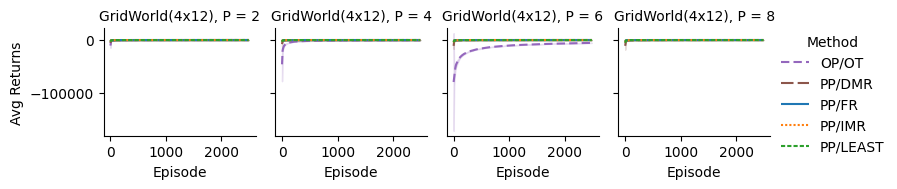

In [32]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


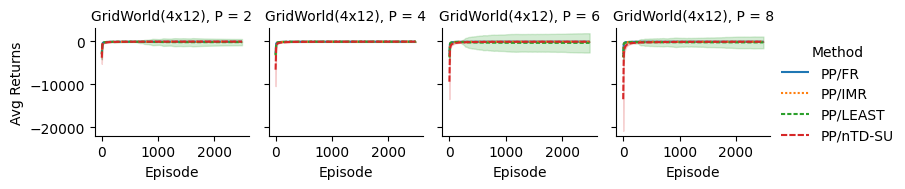

In [33]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


### IceWorld/4x4, $\gamma=1$

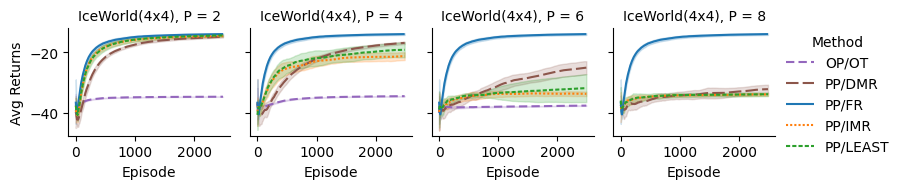

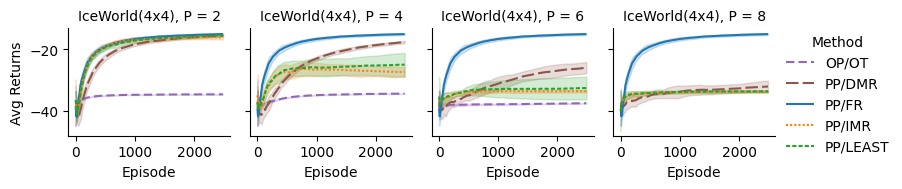

In [34]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="one-step"
)


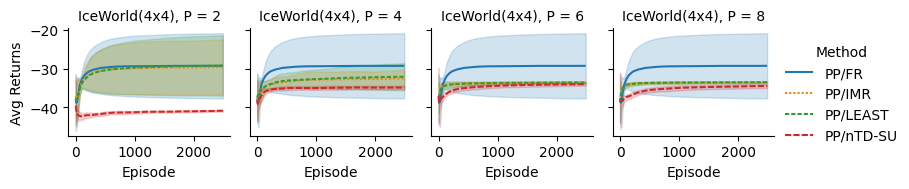

In [35]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="n-step"
)


### IceWorld/4x4, $\gamma=0.99$

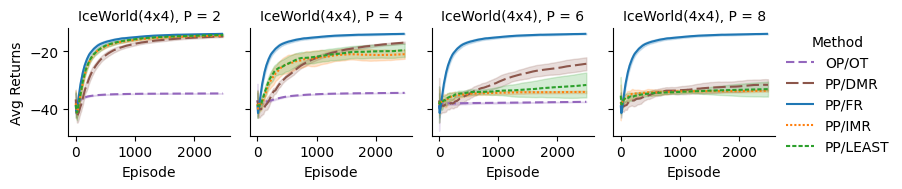

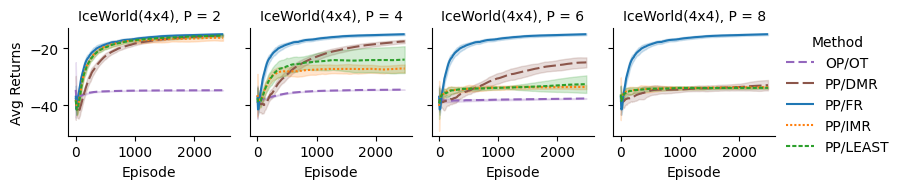

In [36]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


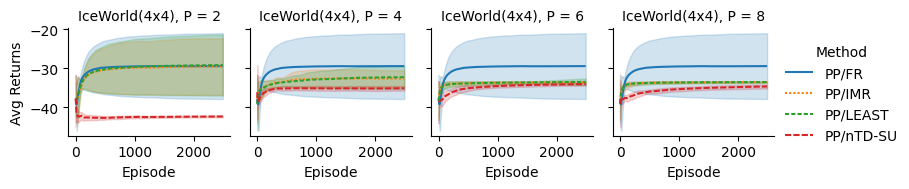

In [37]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


### IceWorld/8x8, $\gamma=1$

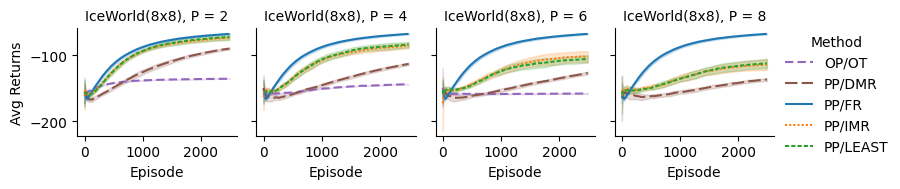

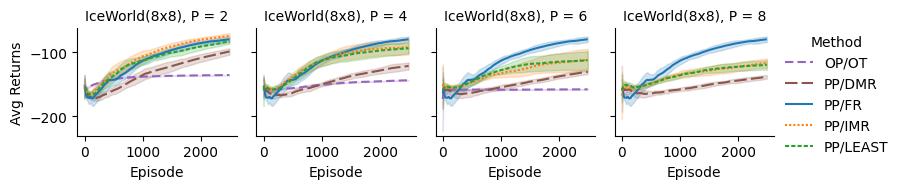

In [38]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="one-step"
)


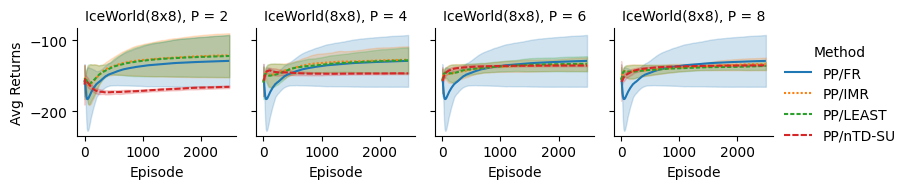

In [39]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="n-step"
)


### IceWorld/8x8, $\gamma=0.99$

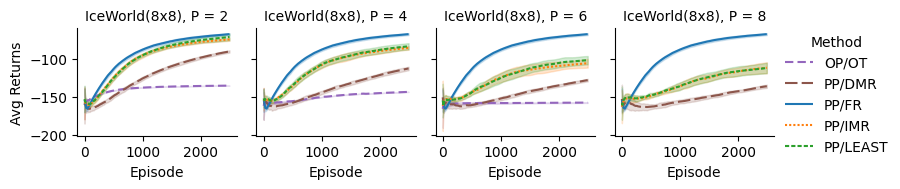

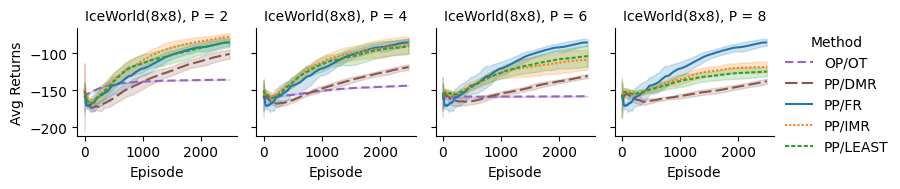

In [40]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


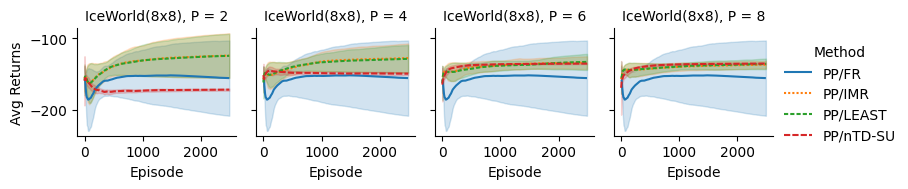

In [41]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


### RedGreenSeq/n=9, $\gamma = 1$

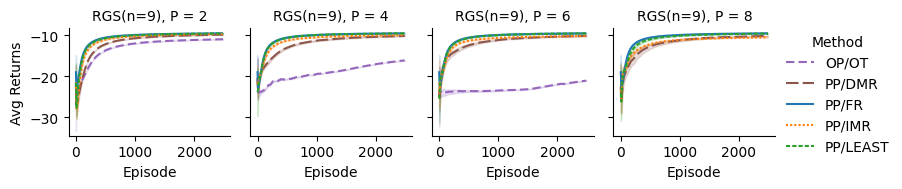

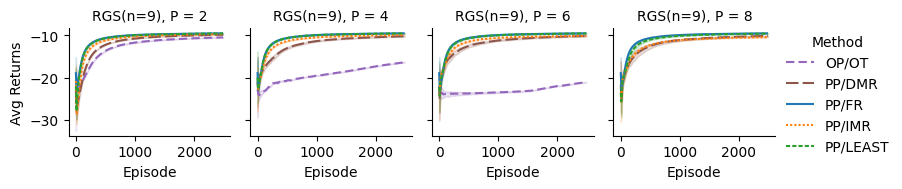

In [42]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="one-step"
)


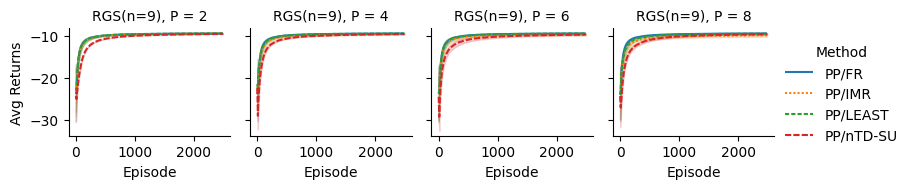

In [43]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="n-step"
)


### RedGreenSeq/n=9, $\gamma = 0.99$

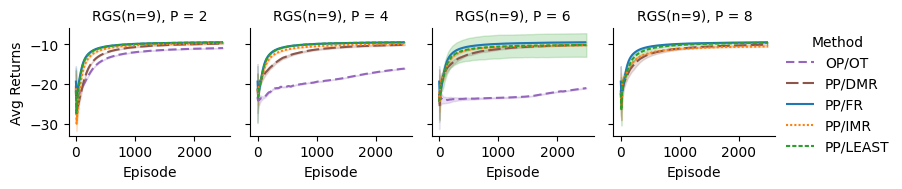

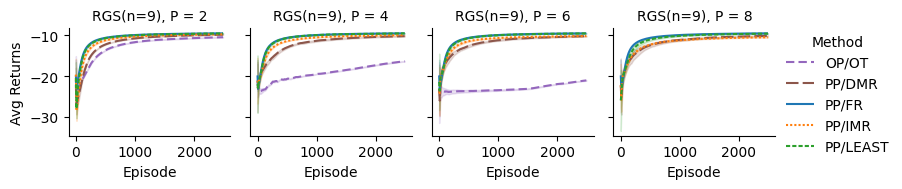

In [44]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


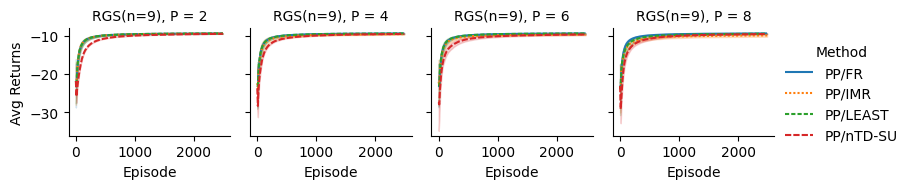

In [45]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


### TowerOfHanoi/disks=4, $\gamma = 1$

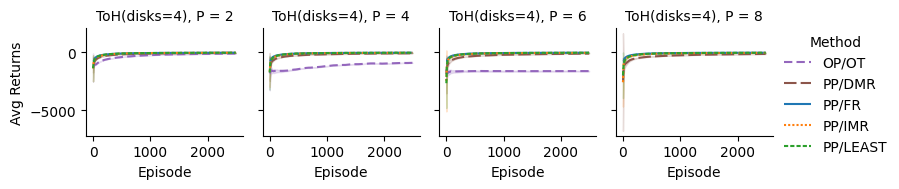

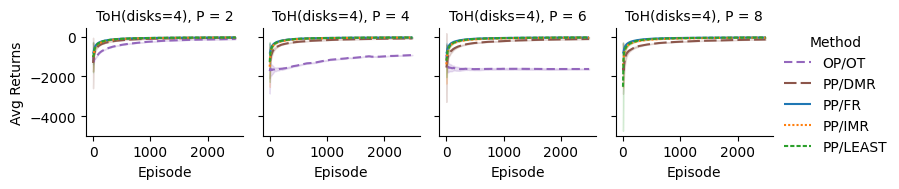

In [46]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="one-step"
)


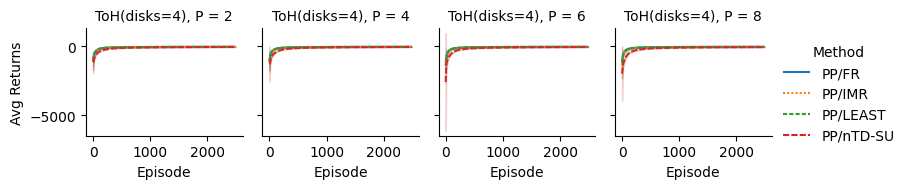

In [47]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=1,
    df_data=df
    _returns_curves,
    suffix="n-step"
)


### TowerOfHanoi/disks=4, $\gamma = 0.99$

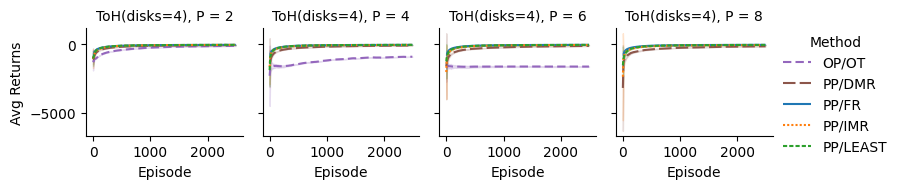

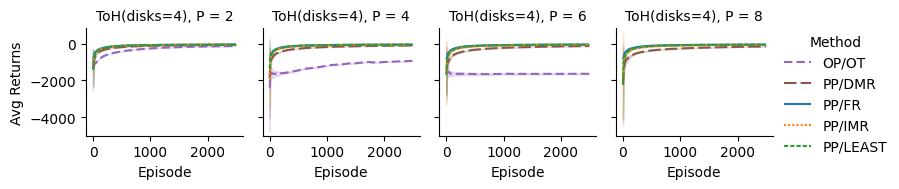

In [48]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


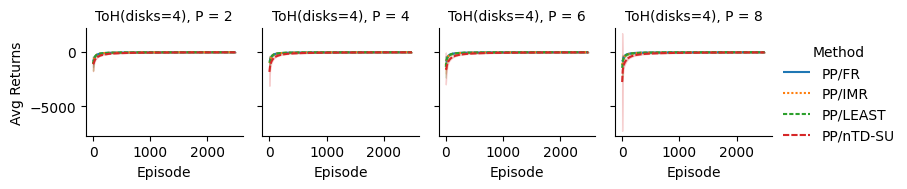

In [49]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


## Other Envs (Sparse Rewards)

### FrozenLake-v1/4x4, $\gamma = 1$

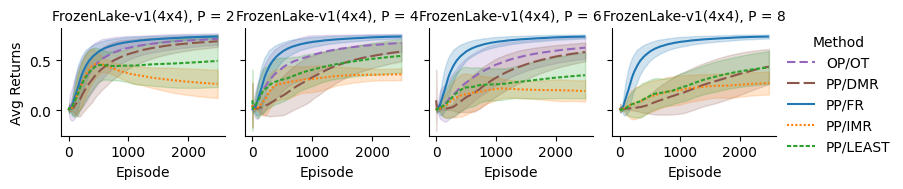

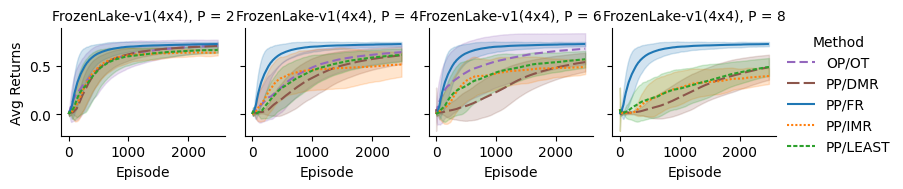

In [50]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="one-step"
)


Methods that rely on feedback do not perform well in the absence of feedback

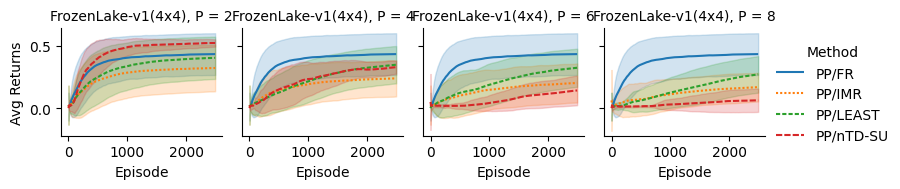

In [51]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="n-step"
)


### FrozenLake-v1/4x4, $\gamma = 0.99$

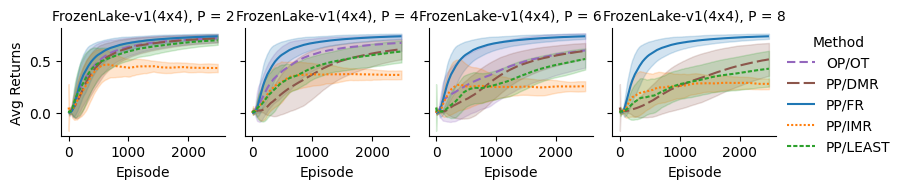

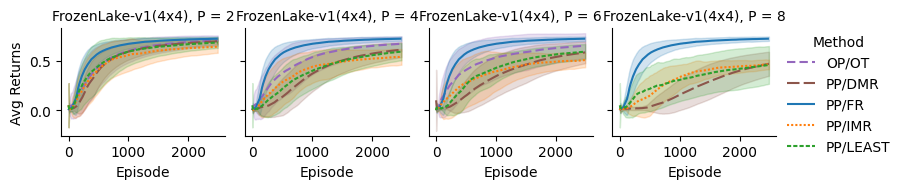

In [52]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


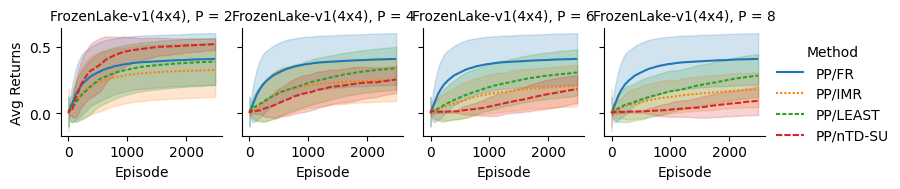

In [53]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)
